- Fit a linear regression model with 2+ features of your choice. Get and plot the coefficients.
- Use train-test split or leave-one-out cross-validation to get regression metrics: MSE, RMSE, MAE, R^2.
- Visualize the plane of best fit in 3D, with 2 features.
- Write a short, simple blog post about your elections model. (Or about your pageviews model, whichever you prefer!)
- AWESOME BUT DIFFICULT STRETCH GOAL: In your 3D visualization, can you include the actual datapoints, like in this notebook? https://nbviewer.jupyter.org/urls/s3.amazonaws.com/datarobotblog/notebooks/multiple_regression_in_python.ipynb Can you also include the residual lines from the datapoints to the plane of the best fit, like in _An Introduction to Statistical Learning?_

# Fit a linear regression model with 2+ features of your choice.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
columns = ['Year','Incumbent Party Candidate','Other Candidate','Incumbent Party Vote Share']

data = [[1952,"Stevenson","Eisenhower",44.6],
        [1956,"Eisenhower","Stevenson",57.76],
        [1960,"Nixon","Kennedy",49.91],
        [1964,"Johnson","Goldwater",61.34],
        [1968,"Humphrey","Nixon",49.60],
        [1972,"Nixon","McGovern",61.79],
        [1976,"Ford","Carter",48.95],
        [1980,"Carter","Reagan",44.70],
        [1984,"Reagan","Mondale",59.17],
        [1988,"Bush, Sr.","Dukakis",53.94],
        [1992,"Bush, Sr.","Clinton",46.55],
        [1996,"Clinton","Dole",54.74],
        [2000,"Gore","Bush, Jr.",50.27],
        [2004,"Bush, Jr.","Kerry",51.24],
        [2008,"McCain","Obama",46.32],
        [2012,"Obama","Romney",52.00], 
        [2016,"Clinton","Trump",48.2]]
        
votes = pd.DataFrame(data=data, columns=columns)

In [3]:
columns = ['Year','Average Recent Growth in Personal Incomes']

data = [[1952,2.40],
        [1956,2.89],
        [1960, .85],
        [1964,4.21],
        [1968,3.02],
        [1972,3.62],
        [1976,1.08],
        [1980,-.39],
        [1984,3.86],
        [1988,2.27],
        [1992, .38],
        [1996,1.04],
        [2000,2.36],
        [2004,1.72],
        [2008, .10],
        [2012, .95], 
        [2016, .10]]
        
growth = pd.DataFrame(data=data, columns=columns)

In [34]:
attacks = pd.read_csv('/Users/stephensinclair//Desktop/Unit2-Regression1/attacks.csv', 
                     encoding = 'ISO-8859-1')

In [35]:
attacks = (attacks
          .where(attacks.Country=='USA')
          .groupby('Year')
          .count()
          .reset_index()
          .rename(columns={'Country': 'Shark Attacks'})[['Year','Shark Attacks']])

In [36]:
list = [1952,1956,1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016]
attacks = attacks[attacks['Year'].isin(list)]
attacks['Year'] = attacks['Year'].astype(int)
attacks.head()

,Year,Shark Attacks
113,1952,11
117,1956,9
121,1960,25
125,1964,14
129,1968,15


In [37]:
attacks.shape

(17, 2)

In [38]:
df = votes.merge(growth).merge(deaths).merge(attacks)
df.shape

(17, 7)

In [39]:
df

,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Shark Attacks
0,1952,Stevenson,Eisenhower,44.60,2.40,190,11
1,1956,Eisenhower,Stevenson,57.76,2.89,0,9
2,1960,Nixon,Kennedy,49.91,0.85,0,25
3,1964,Johnson,Goldwater,61.34,4.21,1,14
4,1968,Humphrey,Nixon,49.60,3.02,146,15
5,1972,Nixon,McGovern,61.79,3.62,0,9
6,1976,Ford,Carter,48.95,1.08,2,18
7,1980,Carter,Reagan,44.70,-0.39,0,9
8,1984,Reagan,Mondale,59.17,3.86,0,21
9,1988,"Bush, Sr.",Dukakis,53.94,2.27,0,26


In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model = LinearRegression()

In [42]:
features = ['Average Recent Growth in Personal Incomes', 'Shark Attacks']
target = 'Incumbent Party Vote Share'

X = df[features]
y = df[target]

X.shape, y.shape

((17, 2), (17,))

In [43]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
y_pred = model.predict(X)

# Get and plot the coefficients.

In [68]:
model.coef_

array([3.2019496 , 0.06527535])

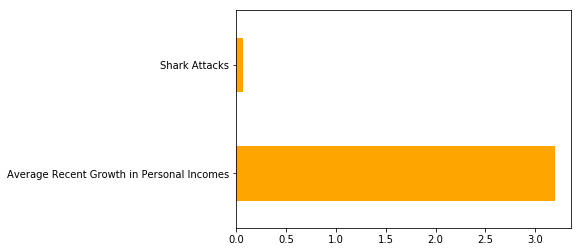

In [70]:
pd.Series(model.coef_, features).plot.barh(color='orange');

# Use train-test split or leave-one-out cross-validation to get regression metrics: MSE, RMSE, MAE, R^2.

In [52]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [57]:
# fit the model

model = LinearRegression()

In [58]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
y_test_pred = model.predict(X_test)

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [61]:
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mse)

In [62]:
print(f'Mean squared error: {mse}')
print(f'Root mean squared error: {rmse}')
print(f'Mean absolute error: {mae}')
print(f'R^2: {r2}')

Mean squared error: 9.885656636308305
Root mean squared error: 3.1441464082177064
Mean absolute error: 2.775007928742083
R^2: 0.6882789430785559


# Visualize the plane of best fit in 3D, with 2 features.

In [63]:
from mpl_toolkits import mplot3d

In [64]:
def viz3D(fitted_model, df, features, target='', num=100):
    """
    Visualize model predictions in 3D, for regression or binary classification
    
    Parameters
    ----------
    fitted_model : scikit-learn model, already fitted
    df : pandas dataframe, which was used to fit model
    features : list of strings, name of features 1 & 2
    target : string, name of target
    num : int, number of grid points for each feature
    
    References
    ----------
    https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
    https://scikit-learn.org/stable/auto_examples/tree/plot_iris.html  
    """
    feature1, feature2 = features
    x1 = np.linspace(df[feature1].min(), df[feature1].max(), num)
    x2 = np.linspace(df[feature2].min(), df[feature2].max(), num)
    X1, X2 = np.meshgrid(x1, x2)
    X = np.c_[X1.flatten(), X2.flatten()]
    if hasattr(fitted_model, 'predict_proba'):
        predicted = fitted_model.predict_proba(X)[:,1]
    else:
        predicted = fitted_model.predict(X)
    Z = predicted.reshape(num, num)
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X1, X2, Z, cmap='viridis')
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_zlabel(target)
    plt.show()

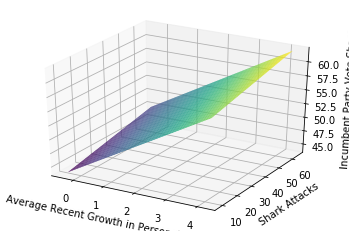

In [65]:
viz3D(model, df, features, target)